In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_colwidth',10000)

### Data Dictionary (Will edit later)


raw/metadata.json
--------
The file contains information about movies from MovieLens - 84,661 lines of json objects that have the following fields:

title – movie title (84,484 unique titles)

directedBy – directors separated by comma (‘,’)

starring – actors separated by comma (‘,’)

dateAdded – date, when the movie was added to MovieLens

avgRating – average rating of a movie, scale of 0.5 to 5

imdbId – movie id on the IMDB website (84,661 unique ids)

item_id – movie id, which is consistent across files (84,661 unique ids)

Example line:
{"title": "Toy Story (1995)", "directedBy": "John Lasseter", "starring": "Tim Allen, Tom Hanks, Don Rickles, Jim Varney, John Ratzenberger, Wallace Shawn, Laurie Metcalf, John Morris, R. Lee Ermey, Annie Potts", "dateAdded": null, "avgRating": 3.89146, "imdbId": "0114709", "item_id": 1}


raw/reviews.json
--------
The file contains 2,624,608 lines of movie reviews collected from the IMDB website. The json objects have the following fields:

item_id – movie id (52,081 unique ids)

txt – review text

Example line:
{"item_id": 172063, "txt": "one-shot record of a belly dancer; \"Carmencita Dancing,\" one of a series of Edison short films featuring \r circus and vaudeville acts, displayed the... um... \"talents\" of a zaftig belly-dancer who agreed to undulate before the camera of the famous \"Black \r Maria\" studio. \r \r The dance was originally intended to be played in a Kinetoscope, a single -person arcade viewer connected to Edison's more famous invention, the phonograph. Through a pair of crude headphones, the latter device supplied an asynchronous soundtrack of \"hootchie-cootchie\" music. \r \r The Kinetograph camera here employed is so new -- even to its inventors \r -- that director Dickson has drastically \"overcranked\" the film, unintentionally producing one of the first examples of slow-motion.\r \r Carmencita's titillating movements were considered by many to be \r scandalous. Thus, the film prompted some of the earliest discussions of film censorship."}

### Movies

In [2]:
metadata_raw = pd.read_json(r"C:\Users\micha\OneDrive\Desktop\Capstone\movie_dataset_public_final\raw\metadata.json", lines=True)

In [3]:
metadata_raw.head()

,title,directedBy,starring,dateAdded,avgRating,imdbId,item_id
0,Toy Story (1995),John Lasseter,"Tim Allen, Tom Hanks, Don Rickles, Jim Varney, John Ratzenberger, Wallace Shawn, Laurie Metcalf, John Morris, R. Lee Ermey, Annie Potts",None,3.89146,114709,1
1,Jumanji (1995),Joe Johnston,"Jonathan Hyde, Bradley Pierce, Robin Williams, Kirsten Dunst",None,3.26605,113497,2
2,Grumpier Old Men (1995),Howard Deutch,"Jack Lemmon, Walter Matthau, Ann-Margret , Sophia Loren",None,3.17146,113228,3
3,Waiting to Exhale (1995),Forest Whitaker,"Angela Bassett, Loretta Devine, Whitney Houston, Lela Rochon",None,2.86824,114885,4
4,Father of the Bride Part II (1995),Charles Shyer,"Steve Martin, Martin Short, Diane Keaton, Kimberly Williams, George Newbern, Kieran Culkin",None,3.07620,113041,5


In [4]:
metadata_raw.shape

(84661, 7)

In [5]:
# only missing info from dateAdded
metadata_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84661 entries, 0 to 84660
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   title       84661 non-null  object 
 1   directedBy  84661 non-null  object 
 2   starring    84661 non-null  object 
 3   dateAdded   78143 non-null  object 
 4   avgRating   84661 non-null  float64
 5   imdbId      84661 non-null  int64  
 6   item_id     84661 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 4.5+ MB


In [6]:
# roughly 15% of data is not clean
# Date added is not release date, can drop
metadata_raw.isna().sum(axis=0) / metadata_raw.shape[0]*100

title         0.00000
directedBy    0.00000
starring      0.00000
dateAdded     7.69894
avgRating     0.00000
imdbId        0.00000
item_id       0.00000
dtype: float64

In [7]:
# Date added is not the same as year release date, imdbID is not used to join any columns, can drop
metadata_raw.drop(columns=['dateAdded', 'imdbId'], inplace=True)  

In [8]:
## No duplicate entries, good 
metadata_raw.duplicated().sum()

0

In [9]:
metadata_raw['Year'] = metadata_raw['title'].str.extract(r'\((\d{4})\)$')

In [10]:
metadata_raw.head()

,title,directedBy,starring,avgRating,item_id,Year
0,Toy Story (1995),John Lasseter,"Tim Allen, Tom Hanks, Don Rickles, Jim Varney, John Ratzenberger, Wallace Shawn, Laurie Metcalf, John Morris, R. Lee Ermey, Annie Potts",3.89146,1,1995
1,Jumanji (1995),Joe Johnston,"Jonathan Hyde, Bradley Pierce, Robin Williams, Kirsten Dunst",3.26605,2,1995
2,Grumpier Old Men (1995),Howard Deutch,"Jack Lemmon, Walter Matthau, Ann-Margret , Sophia Loren",3.17146,3,1995
3,Waiting to Exhale (1995),Forest Whitaker,"Angela Bassett, Loretta Devine, Whitney Houston, Lela Rochon",2.86824,4,1995
4,Father of the Bride Part II (1995),Charles Shyer,"Steve Martin, Martin Short, Diane Keaton, Kimberly Williams, George Newbern, Kieran Culkin",3.07620,5,1995


In [11]:
# Year gets dropped down to 1 Percent missing
metadata_raw.isna().sum(axis=0) / metadata_raw.shape[0]*100

title         0.000000
directedBy    0.000000
starring      0.000000
avgRating     0.000000
item_id       0.000000
Year          1.040621
dtype: float64

In [12]:
# Change Data type so it's numerical
metadata_raw['Year'] = metadata_raw['Year'].astype('Int64')

In [13]:
metadata_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84661 entries, 0 to 84660
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   title       84661 non-null  object 
 1   directedBy  84661 non-null  object 
 2   starring    84661 non-null  object 
 3   avgRating   84661 non-null  float64
 4   item_id     84661 non-null  int64  
 5   Year        83780 non-null  Int64  
dtypes: Int64(1), float64(1), int64(1), object(3)
memory usage: 4.0+ MB


In [14]:
metadata_raw.head()

,title,directedBy,starring,avgRating,item_id,Year
0,Toy Story (1995),John Lasseter,"Tim Allen, Tom Hanks, Don Rickles, Jim Varney, John Ratzenberger, Wallace Shawn, Laurie Metcalf, John Morris, R. Lee Ermey, Annie Potts",3.89146,1,1995
1,Jumanji (1995),Joe Johnston,"Jonathan Hyde, Bradley Pierce, Robin Williams, Kirsten Dunst",3.26605,2,1995
2,Grumpier Old Men (1995),Howard Deutch,"Jack Lemmon, Walter Matthau, Ann-Margret , Sophia Loren",3.17146,3,1995
3,Waiting to Exhale (1995),Forest Whitaker,"Angela Bassett, Loretta Devine, Whitney Houston, Lela Rochon",2.86824,4,1995
4,Father of the Bride Part II (1995),Charles Shyer,"Steve Martin, Martin Short, Diane Keaton, Kimberly Williams, George Newbern, Kieran Culkin",3.07620,5,1995


In [15]:
# roughly 15% of data is not clean
# Date added is not release date, can drop
metadata_raw.isna().sum(axis=0) / metadata_raw.shape[0]*100

title         0.000000
directedBy    0.000000
starring      0.000000
avgRating     0.000000
item_id       0.000000
Year          1.040621
dtype: float64

In [16]:
# We can tell that they are all individual movies, ... going to have to remove all of them with the na values
metadata_raw[metadata_raw['Year'].isna()]

,title,directedBy,starring,avgRating,item_id,Year
8496,"Babe Ruth Story, The (1948)",Roy Del Ruth,"William Bendix, Claire Trevor, Charles Bickford",2.50000,25936,<NA>
8636,"Heroes of Telemark, The (1965)",Anthony Mann,"Kirk Douglas, Richard Harris, Ulla Jacobsson,Michael Redgrave",2.85714,26137,<NA>
8964,Jack's Back (1988),Rowdy Herrington,"James Spader, Cynthia Gibb, Jim Haynie",3.06522,26628,<NA>
9174,From Dusk Till Dawn 2: Texas Blood Money (1999),Scott Spiegel,"Bruce Campbell, Danny Trejo, Robert Patrick, Muse Watson, Brett Harrelson, Bo Hopkins, Raymond Cruz, Duane Whitaker",2.12222,27008,<NA>
9237,After the Rain (Ame agaru) (1999),Takashi Koizumi,"Akira Terao, Yoshiko Miyazaki, Shirô Mifune",3.75926,27189,<NA>
...,...,...,...,...,...,...
84273,Futari no Hitomi,,,0.00000,238540,<NA>
84278,The Craven Cove Murders,Ron Ford,"Randal Malone,Trish Haight,Ted Newsom",0.00000,238550,<NA>
84372,Scott Joplin: King of Ragtime Composers,Amelia Anderson,,0.00000,238738,<NA>
84514,Eric,James Goldstone,"Patricia Neal,Claude Akins,Sian Barbara Allen,Mark Hamill,Nehemiah Persoff",0.00000,239022,<NA>


In [17]:
metadata_raw = metadata_raw[pd.notnull(metadata_raw['Year'])]

In [18]:
# Kept All columns without null values
metadata_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83780 entries, 0 to 84659
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   title       83780 non-null  object 
 1   directedBy  83780 non-null  object 
 2   starring    83780 non-null  object 
 3   avgRating   83780 non-null  float64
 4   item_id     83780 non-null  int64  
 5   Year        83780 non-null  Int64  
dtypes: Int64(1), float64(1), int64(1), object(3)
memory usage: 4.6+ MB


In [19]:
# Checking if the lowest year is reasonable (not like 1200 or something)
metadata_raw['Year'].describe()

count    83780.000000
mean      1993.936166
std         25.276044
min       1874.000000
25%       1979.000000
50%       2004.000000
75%       2014.000000
max       2021.000000
Name: Year, dtype: float64

(array([9.0000e+00, 2.8100e+02, 3.9200e+02, 1.3290e+03, 4.0430e+03,
        5.4310e+03, 7.8310e+03, 9.8880e+03, 1.7208e+04, 3.7368e+04]),
 array([1874.0, 1888.7, 1903.4, 1918.1, 1932.8, 1947.5, 1962.2, 1976.9,
        1991.6, 2006.3, 2021.0], dtype=object),
 <BarContainer object of 10 artists>)

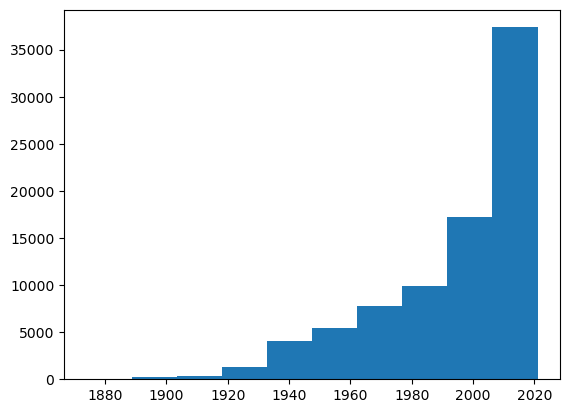

In [20]:
# Looks good, no awkward years atm 
plt.hist(metadata_raw['Year'].values)

In [21]:
# Want to add a multiplier to bring the values of movie reviews from a range of 0.5-5 to 1-10

metadata_raw['avgRating'] = metadata_raw['avgRating'].multiply(2)

In [22]:
metadata_raw.head()

,title,directedBy,starring,avgRating,item_id,Year
0,Toy Story (1995),John Lasseter,"Tim Allen, Tom Hanks, Don Rickles, Jim Varney, John Ratzenberger, Wallace Shawn, Laurie Metcalf, John Morris, R. Lee Ermey, Annie Potts",7.78292,1,1995
1,Jumanji (1995),Joe Johnston,"Jonathan Hyde, Bradley Pierce, Robin Williams, Kirsten Dunst",6.53210,2,1995
2,Grumpier Old Men (1995),Howard Deutch,"Jack Lemmon, Walter Matthau, Ann-Margret , Sophia Loren",6.34292,3,1995
3,Waiting to Exhale (1995),Forest Whitaker,"Angela Bassett, Loretta Devine, Whitney Houston, Lela Rochon",5.73648,4,1995
4,Father of the Bride Part II (1995),Charles Shyer,"Steve Martin, Martin Short, Diane Keaton, Kimberly Williams, George Newbern, Kieran Culkin",6.15240,5,1995


In [23]:
# Checking the rating, we see the ratings have a minimum of 0
# previously we checked for null values and there are none fortunately
# remove the movies that have less than a rating of 1
metadata_raw['avgRating'].describe()

count    83780.000000
mean         5.088886
std          2.632948
min          0.000000
25%          4.043640
50%          6.000000
75%          6.989825
max         10.000000
Name: avgRating, dtype: float64

In [24]:
# Should be last thing that is from the original dataset that needs to be addressed, joining columns afterwards
cleaner_df = metadata_raw[(metadata_raw['avgRating']>=1)]

In [25]:
# Still a big enough dataset, 70k entries
cleaner_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70077 entries, 0 to 84561
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   title       70077 non-null  object 
 1   directedBy  70077 non-null  object 
 2   starring    70077 non-null  object 
 3   avgRating   70077 non-null  float64
 4   item_id     70077 non-null  int64  
 5   Year        70077 non-null  Int64  
dtypes: Int64(1), float64(1), int64(1), object(3)
memory usage: 3.8+ MB


In [26]:
cleaner_df.head()

,title,directedBy,starring,avgRating,item_id,Year
0,Toy Story (1995),John Lasseter,"Tim Allen, Tom Hanks, Don Rickles, Jim Varney, John Ratzenberger, Wallace Shawn, Laurie Metcalf, John Morris, R. Lee Ermey, Annie Potts",7.78292,1,1995
1,Jumanji (1995),Joe Johnston,"Jonathan Hyde, Bradley Pierce, Robin Williams, Kirsten Dunst",6.53210,2,1995
2,Grumpier Old Men (1995),Howard Deutch,"Jack Lemmon, Walter Matthau, Ann-Margret , Sophia Loren",6.34292,3,1995
3,Waiting to Exhale (1995),Forest Whitaker,"Angela Bassett, Loretta Devine, Whitney Houston, Lela Rochon",5.73648,4,1995
4,Father of the Bride Part II (1995),Charles Shyer,"Steve Martin, Martin Short, Diane Keaton, Kimberly Williams, George Newbern, Kieran Culkin",6.15240,5,1995


In [27]:
# cool, minimum value of avg rating is now 1
cleaner_df['avgRating'].describe()

count    70077.000000
mean         6.083977
std          1.494595
min          1.000000
25%          5.285720
50%          6.236940
75%          7.000000
max         10.000000
Name: avgRating, dtype: float64

In [28]:
# we can assume that theres only one director per movie, but maybe there's an additional credit, lets count the number of words in each directedBy entry

cleaner_df['director_count'] = cleaner_df['directedBy'].str.split().apply(len)

C:\Users\micha\AppData\Local\Temp\ipykernel_30400\2591283451.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaner_df['director_count'] = cleaner_df['directedBy'].str.split().apply(len)


In [29]:
cleaner_df['director_count'].value_counts()

2     59051
3      6595
0      1943
4      1564
1       343
5       272
6       149
7        36
8        29
10       15
12       13
14       12
9        12
11        8
16        8
18        3
13        3
23        2
17        2
22        2
15        2
20        2
27        1
76        1
49        1
26        1
19        1
31        1
25        1
58        1
53        1
56        1
33        1
Name: director_count, dtype: int64

In [30]:
cleaner_df[cleaner_df['director_count'] == 4]

,title,directedBy,starring,avgRating,item_id,Year,director_count
28,"City of Lost Children, The (Cité des enfants perdus, La) (1995)","Marc Caro, Jean-Pierre Jeunet","Ron Perlman, Daniel Emilfork, Judith Vittet, Dominique Pinon, Jean-Claude Dreyfus",7.82856,29,1995,4
41,Dead Presidents (1995),"Albert Hughes, Allen Hughes","Larenz Tate, Keith David, Chris Tucker, Freddy Rodríguez, Rose Jackson, N'Bushe Wright, Jenifer Lewis, Clifton Powell, Terrence Howard, Sticky Fingaz, Bokeem Woodbine, David Barry Gray, Michael Imperioli, Clifton Collins Jr., Tony Sirico, Seymour Cassel, Martin Sheen, Isaiah Washington",6.10406,42,1995,4
47,Pocahontas (1995),"Mike Gabriel, Eric Goldberg","Mel Gibson, Irene Bedard, Linda Hunt, Judy Kuhn, Christian Bale",5.95052,48,1995,4
154,Blue in the Face (1995),"Paul Auster, Wayne Wang","Lou Reed, Michael J. Fox, Roseanne, Jim Jarmusch, Lily Tomlin, Jared Harris, Giancarlo Esposito, Malik Yoba, José Zúñiga, Victor Argo, Stephen Gevedon, Madonna, Mira Sorvino, Keith David, Harvey Keitel, Michael Badalucco, Debra Wilson, RuPaul,",7.06098,156,1995,4
185,Party Girl (1995),Daisy von Scherler Mayer,"Parker Posey, Omar Townsend, Sasha von Scherler",6.89268,187,1995,4
...,...,...,...,...,...,...,...
79205,Hunt for the Skinwalker (2018),Jeremy Kenyon Lockyer Corbell,"George Knapp,Jeremy Kenyon Lockyer Corbell,Robbie Williams,Robert Bigelow",8.00000,228405,2018,4
80874,Happily Never After (2017),David S. Cass Sr.,"Danielle Savre,Rick Cosnett,Bianca A. Santos,Ted McGinley,David Carzell",10.00000,231743,2017,4
81457,Canvas (2020),Frank E. Abney III,,6.00000,232909,2020,4
81543,Second Samuel (2020),J. Wayne Patterson Jr.,"E. Roger Mitchell,Bethany Anne Lind,Stan Houston,Clifton Truman Daniel,Wesley Truman Daniel",2.00000,233081,2020,4


In [31]:
# Gets a column counting by directs, we now see it's seperated by commas
cleaner_df['director_count'] = cleaner_df["directedBy"].str.count(",") + 1

C:\Users\micha\AppData\Local\Temp\ipykernel_30400\2968166419.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaner_df['director_count'] = cleaner_df["directedBy"].str.count(",") + 1


In [32]:
cleaner_df['director_count'].value_counts()

1     68200
2      1595
3       160
4        40
5        23
7        18
6        15
8         7
11        4
9         3
13        2
10        2
26        2
36        1
25        1
15        1
12        1
27        1
30        1
Name: director_count, dtype: int64

In [33]:
cleaner_df[cleaner_df['director_count'] == 5]

,title,directedBy,starring,avgRating,item_id,Year,director_count
1319,Vampire in Venice (Nosferatu a Venezia) (Nosferatu in Venice) (1986),"Augusto Caminito, Mario Caiano, Luigi Cozzi, Klaus Kinski, Maurizio Lucidi","Klaus Kinski, Donald Pleasence, Christopher Plummer, Barbara De Rossi",6.36568,1349,1986,5
6875,Ben-Hur: A Tale of the Christ (1925),"Fred Niblo, Charles Brabin, Christy Cabanne, J.J. Cohn, Rex Ingram","Ramon Novarro,Francis X. Bushman,May McAvoy,Betty Bronson,Claire McDowell,Kathleen Key,Carmel Myers,",7.42294,6986,1925,5
8220,"Terror, The (1963)","Roger Corman, Francis Ford Coppola, Monte Hellman, Jack Hill, Jack Nicholson","Boris Karloff, Jack Nicholson, Sandra Knight , Dick Miller",4.67256,8903,1963,5
9635,It's All True (1993),"Bill Krohn, Myron Meisel, Orson Welles, Richard Wilson, Norman Foster",Miguel Ferrer,6.78572,31011,1993,5
10216,"Racket, The (1951)","John Cromwell, Mel Ferrer, Tay Garnett, Nicholas Ray, Sherman Todd","Robert Mitchum, Lizabeth Scott, Robert Ryan, William Talman, Ray Collins, William Conrad, Les Tremayne, Don Beddoe, Pat Flaherty, Milburn Stone",6.80952,33914,1951,5
11662,Magical Mystery Tour (1967),"George Harrison, Bernard Knowles, John Lennon, Paul McCartney, Ringo Starr","George Harrison, John Lennon, Paul McCartney, Ringo Starr",5.71818,51044,1967,5
12655,Tarzan Escapes (1936),"Richard Thorpe, John Farrow, James C. McKay, George B. Seitz, William A. Wellman","Johnny Weissmuller, Maureen O'Sullivan",6.05000,59178,1936,5
14170,Summer School (2006),"Lance Hendrickson, Troy McCall, Mike P. Nelson, Steven Rhoden, Ben Trandem","Simon Wallace, Amy Cocchiarella, Tony D. Czech, Lance Hendrickson, Ty Richardson",5.00000,70826,2006,5
14173,Queen Kelly (1929),"Erich von Stroheim, Richard Boleslawski, Edmund Goulding, Irving Thalberg, Sam Wood","Gloria Swanson, Walter Byron, Seena Owen",6.94444,70833,1929,5
15434,Tales from the Golden Age (Amintiri din epoca de aur) (2009),"Hanno Höfer, Razvan Marculescu, Cristian Mungiu, Constantin Popescu, Ioana Uricaru","Diana Cavallioti, Radu Iacoban, Vlad Ivanov, Tania Popa, Liliana Mocanu",7.23530,78268,2009,5


In [34]:


# Gets a column counting by actors, we see it's seperated by commas
cleaner_df['actor_count'] = cleaner_df["starring"].str.count(",") + 1

C:\Users\micha\AppData\Local\Temp\ipykernel_30400\764016326.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaner_df['actor_count'] = cleaner_df["starring"].str.count(",") + 1


In [35]:
cleaner_df['actor_count'].value_counts()

5     33485
4     11188
1      8391
3      6505
2      2927
6      2188
7      1289
8       908
9       642
10      493
11      409
12      332
13      255
15      212
14      201
16      107
17      102
18       92
20       55
19       53
21       51
22       29
24       24
23       18
29       16
25       15
28       14
26       14
27       12
30       10
31        7
32        6
35        4
41        3
36        3
33        2
34        2
37        2
40        2
57        2
70        1
38        1
45        1
52        1
51        1
65        1
42        1
Name: actor_count, dtype: int64

In [36]:
cleaner_df.head()

,title,directedBy,starring,avgRating,item_id,Year,director_count,actor_count
0,Toy Story (1995),John Lasseter,"Tim Allen, Tom Hanks, Don Rickles, Jim Varney, John Ratzenberger, Wallace Shawn, Laurie Metcalf, John Morris, R. Lee Ermey, Annie Potts",7.78292,1,1995,1,10
1,Jumanji (1995),Joe Johnston,"Jonathan Hyde, Bradley Pierce, Robin Williams, Kirsten Dunst",6.53210,2,1995,1,4
2,Grumpier Old Men (1995),Howard Deutch,"Jack Lemmon, Walter Matthau, Ann-Margret , Sophia Loren",6.34292,3,1995,1,4
3,Waiting to Exhale (1995),Forest Whitaker,"Angela Bassett, Loretta Devine, Whitney Houston, Lela Rochon",5.73648,4,1995,1,4
4,Father of the Bride Part II (1995),Charles Shyer,"Steve Martin, Martin Short, Diane Keaton, Kimberly Williams, George Newbern, Kieran Culkin",6.15240,5,1995,1,6


### Tags

In [37]:
#importing dataset

tags_raw = pd.read_json(r"C:\Users\micha\OneDrive\Desktop\Capstone\movie_dataset_public_final\raw\tags.json", lines=True)

tags_raw.head()

,tag,id
0,aardman,22
1,secret service,112
2,hillarious,167
3,christian,270
4,mummy,362


In [38]:
tags_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tag     1094 non-null   object
 1   id      1094 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 17.2+ KB


In [39]:
tag_count = pd.read_json(r"C:\Users\micha\OneDrive\Desktop\Capstone\movie_dataset_public_final\raw\tag_count.json", lines=True)

tag_count.head()

,item_id,tag_id,num
0,1,86963,4
1,1,42940,1
2,1,37116,26
3,1,52206,1
4,1,34442,21


In [40]:
tag_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212704 entries, 0 to 212703
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   item_id  212704 non-null  int64
 1   tag_id   212704 non-null  int64
 2   num      212704 non-null  int64
dtypes: int64(3)
memory usage: 4.9 MB


In [41]:
tag_count['item_id'].nunique()

39685

In [42]:
# trying to figure out what this means?


tag_df = tag_count.merge(, on='item_id', how='left')

SyntaxError: invalid syntax (951603790.py, line 4)

### Reviews

In [ ]:
reviews_raw = pd.read_json(r"C:\Users\micha\OneDrive\Desktop\Capstone\movie_dataset_public_final\raw\reviews.json", lines=True)

In [ ]:
reviews_raw.head()

In [ ]:
reviews_raw.shape

In [ ]:

reviews_raw.isna().sum(axis=0) / reviews_raw.shape[0]*100


In [ ]:
#merging both columns so that the reviews are visible under each

merged_df = cleaner_df.merge(reviews_raw, on='item_id', how='left')

Stuff to explore: 
count of actors, count of reviews, check for multiple directors

Sentiment analysis, count vectorization, 

instead of dummy variables, add a feature to show how many times the director has shown up.

or bin the directors (ie, novice, intermediate, explore the data)



In [ ]:

merged_df.head(700)

In [ ]:
# Dropping where we merged it on
merged_df.drop(columns=['item_id'], inplace=True) 

In [ ]:
# Still looks the same
merged_df.head(700)

In [43]:
# Want to add a column for number of directors as well as number of starring actors
# will do this with NLP